In [1]:
# Check Python Version
!python --version

Python 3.10.12


In [2]:
# Check Ubuntu Version
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [3]:
# Check CUDA/cuDNN Version
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
/usr/local/cuda/bin/nvcc


In [4]:
# Check GPU
!nvidia-smi

Sat May  4 10:41:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 476, done.
remote: Counting objects: 100% (207/207), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 476 (delta 141), reused 124 (delta 91), pack-reused 269
Receiving objects: 100% (476/476), 131.59 KiB | 5.26 MiB/s, done.
Resolving deltas: 100% (243/243), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.0 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has a Tesla T4 GPU!
We will install the latest stable RAPIDS via pip 24.4.*!  Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 473.

In [6]:
# Critical imports
import cudf
import cuml
import os
import numpy as np
import pandas as pd


In [14]:
import numpy as np
import pandas as pd
import cudf
from cuml.linear_model import LinearRegression
import cupy as cp
import matplotlib.pyplot as plt

#Load data
data = pd.read_csv('/content/nutrition.csv')

#Select relevant columns
data = data[['name', 'serving_size', 'calories', 'carbohydrate', 'total_fat', 'protein']]


In [15]:
#Remove non-numeric characters from relevant columns
data[['calories', 'carbohydrate', 'total_fat', 'protein']] = (
data[['calories', 'carbohydrate', 'total_fat', 'protein']]
.replace({'\D+': '', '\s+': ''}, regex=True)
.astype(float))


In [16]:
#Convert data to cuDF (GPU-accelerated DataFrame)
cdf = cudf.DataFrame.from_pandas(data)

In [18]:
#Linear Regression with cuML
X = cdf[['protein', 'calories', 'carbohydrate']]
y = cdf['total_fat']
X = cdf[['protein', 'calories', 'carbohydrate']]
y = cdf['total_fat']

reg = LinearRegression()
reg.fit(X, y)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: 0    0.003868
1    0.075675
2   -0.002329
dtype: float64
Intercept: 9.999960021462083


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


In [20]:
#Predict
prediction = reg.predict(cp.array([[98.0, 25.0, 588.0]]))
print("Prediction:", prediction)

Prediction: 0    10.901541
dtype: float64


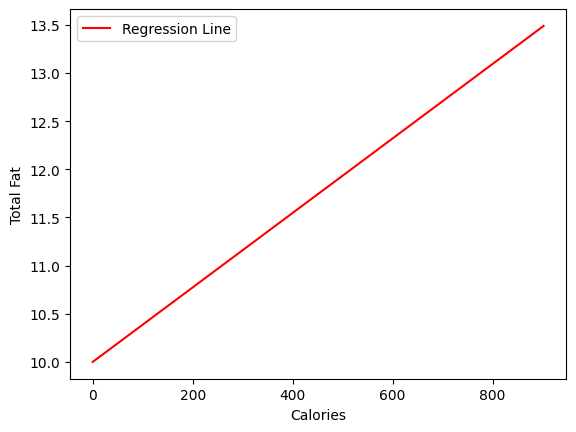

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming reg is your trained LinearRegression model
x_range = np.linspace(cdf['calories'].min(), cdf['calories'].max(), 100)
y_range = reg.intercept_ + reg.coef_[0]*x_range + reg.coef_[1]*cdf['protein'].min() + reg.coef_[2]*cdf['carbohydrate'].min()

# Convert numpy arrays to pandas Series
x_range = pd.Series(x_range)
y_range = pd.Series(y_range)

plt.plot(x_range, y_range, color='red', label='Regression Line')
plt.xlabel('Calories')
plt.ylabel('Total Fat')
plt.legend()
plt.show()






In [ ]:
import time
start_time = time.time()
# CUDA/cuDF code here
print("Execution time:", time.time() - start_time)